In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.30


In [7]:
def build(robot,x=5,y=10,angle=0):
    R=.5
    r=R/5
    disk_center=Disk(robot,x=x,y=y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

    robot.S=Storage()

In [11]:
def randbetween(low,high):
    return rand()*(high-low)+low

In [39]:
def forward(t,robot):
    robot['center'].F=10
    robot['center'].τ=0
    robot.message="forward"
    return True
    
def until_close(t,robot):
    threshold=1
    
    d0=robot['disk 0'].read_distance()
    d30=robot['disk 30'].read_distance()
    d330=robot['disk 330'].read_distance()
    
    if d0<threshold or d30<threshold or d330<threshold:
        return True
    
def backward(t,robot):
    robot['center'].F=-10
    robot.message="backward"
    return True

def turn(t,robot):
    robot['center'].τ=1
    return True
    
    
def until_far(t,robot):
    threshold=2
    d0=robot['disk 0'].read_distance()
    d30=robot['disk 30'].read_distance()
    d330=robot['disk 330'].read_distance()
    if d0>threshold and d30>threshold and d330>threshold:
        return True
    
    

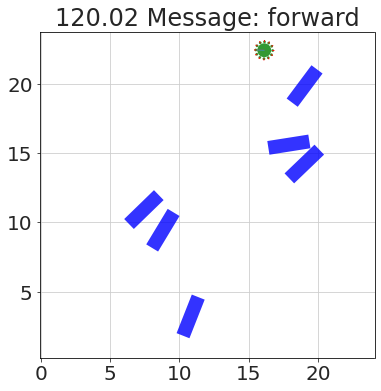

In [42]:
env=FrictionEnvironment(24,24)  # size of the environment
robot=Robot(env)
build(robot)

for i in range(6):
    Box(env,
        x=randbetween(7,21),
        y=randbetween(0,21),
        width=3,
        height=1,
        angle=randbetween(0,360),
        density=100,
       )


run_sim(env,[forward,until_close,backward,turn,until_far],
        figure_width=6,
        total_time=120,  # seconds
        dt_display=.5,  # make this larger for a faster display
       )